# 1. MỞ ĐẦU
Chỉ số chất lượng không khí (Air Quality Index – AQI) là một trong những chỉ số môi trường quan trọng, phản ánh mức độ ô nhiễm không khí và tác động tiềm tàng đến sức khỏe con người. Ở Việt Nam, với tốc độ đô thị hóa nhanh chóng, sự gia tăng dân số và phương tiện giao thông cơ giới, chất lượng không khí tại các thành phố lớn đang có xu hướng suy giảm nghiêm trọng.

Theo Tổ chức Y tế Thế giới (WHO), việc tiếp xúc lâu dài với không khí ô nhiễm là nguyên nhân dẫn đến các bệnh về đường hô hấp như viêm phế quản mãn tính, hen suyễn, thậm chí là ung thư phổi. Đặc biệt, các nhóm đối tượng nhạy cảm như người già, trẻ em và người mắc bệnh mãn tính chịu ảnh hưởng rõ rệt hơn trước sự biến động của chỉ số AQI.

Việc theo dõi và phân tích dữ liệu AQI không chỉ nhằm đánh giá hiện trạng ô nhiễm mà còn giúp phát hiện các quy luật theo thời gian (ngày – giờ), không gian (khu vực – thành phố) và điều kiện môi trường (thời tiết). Thông qua đó, cơ quan chức năng có thể:

Thiết lập các cơ chế cảnh báo kịp thời cho người dân,

Tối ưu hóa quy hoạch đô thị và điều chỉnh chính sách môi trường,

Khuyến nghị về thời điểm phù hợp để tổ chức các hoạt động ngoài trời, đặc biệt đối với trường học, bệnh viện và khu vực đông dân cư.

Với mục tiêu đó, báo cáo này tiến hành phân tích chuyên sâu dữ liệu AQI tại một số tỉnh/thành phố tiêu biểu của Việt Nam, từ đó đề xuất các nhận định mang tính thực tiễn và định hướng ứng dụng.

# import thư viện cần thiết

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. PHÂN TÍCH BIẾN ĐỘNG CHẤT LƯỢNG KHÔNG KHÍ THEO THỜI GIAN

# Đọc file dữ liệu đã gộp

In [ ]:
# Cell đầu tiên trong detection/analysis.ipynb
from aqi_utils import load_all_cities

df = load_all_cities("../result")  # <— luôn lấy CSV mới nhất từ thư mục result/
df.head()

FileNotFoundError: Không tìm thấy CSV nào trong thư mục 'result/'.

# Xem thông tin cơ bản

In [4]:
num_rows, num_cols = df.shape
first_rows = df.head()
column_names = df.columns.tolist()
cities = df['city'].unique()
time_range = (df['timestamp'].min(), df['timestamp'].max())

# Tóm tắt AQI

In [5]:
aqi_summary = df['aqi'].describe()

# Trả kết quả

In [6]:
summary = {
    "Số dòng": num_rows,
    "Số cột": num_cols,
    "Tên cột": column_names,
    "Các tỉnh/thành": cities.tolist(),
    "Khoảng thời gian": time_range,
    "Tóm tắt AQI": aqi_summary.to_dict()
}

first_rows, summary

(                          timestamp     city  aqi  \
 0  2025-01-20 23:12:23.404126+07:00  Cần Thơ   72   
 1  2025-01-21 19:53:07.317845+07:00  Cần Thơ   88   
 2  2025-01-21 20:06:07.018108+07:00  Cần Thơ   88   
 3  2025-01-21 21:02:44.535003+07:00  Cần Thơ   88   
 4  2025-01-21 22:02:41.224833+07:00  Cần Thơ   88   
 
                                         weather_icon wind_speed humidity  
 0  /dl/web/weather/ic-w-04-scattered-clouds-full.svg    10 km/h      83%  
 1  /dl/web/weather/ic-w-11-night-few-clouds-full.svg   0.0 km/h      88%  
 2  /dl/web/weather/ic-w-11-night-few-clouds-full.svg   7.4 km/h      78%  
 3  /dl/web/weather/ic-w-11-night-few-clouds-full.svg   7.4 km/h      78%  
 4  /dl/web/weather/ic-w-04-scattered-clouds-full.svg   3.7 km/h      83%  ,
 {'Số dòng': 29747,
  'Số cột': 6,
  'Tên cột': ['timestamp',
   'city',
   'aqi',
   'weather_icon',
   'wind_speed',
   'humidity'],
  'Các tỉnh/thành': ['Cần Thơ',
   'Đà Nẵng',
   'Hà Nội',
   'Hồ Chí Minh',
   'H

# Chuyển timestamp về dạng datetime

In [7]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Thêm cột ngày để dễ nhóm theo ngày

In [8]:
df['date'] = df['timestamp'].dt.date

# Tính thống kê cơ bản theo thành phố

In [9]:
aqi_stats_by_city = df.groupby('city')['aqi'].agg(['mean', 'std', 'min', 'max']).reset_index()

# Tính trung bình AQI theo ngày cho từng tỉnh

In [10]:
daily_avg_aqi = df.groupby(['date', 'city'])['aqi'].mean().reset_index()

# 2.1 Trung bình AQI theo ngày – Nhận diện xu hướng ô nhiễm theo thời gian
Mục tiêu phân tích
Phân tích AQI trung bình theo từng ngày giúp đánh giá mức độ ô nhiễm không khí biến động như thế nào trong khoảng thời gian dài (từ tháng 1 đến tháng 8/2025). Mục tiêu là:

Nhận diện thành phố có chất lượng không khí kém hoặc bất ổn kéo dài.

Xác định các khoảng thời gian có AQI tăng đột biến để điều tra nguyên nhân hoặc cảnh báo cộng đồng.

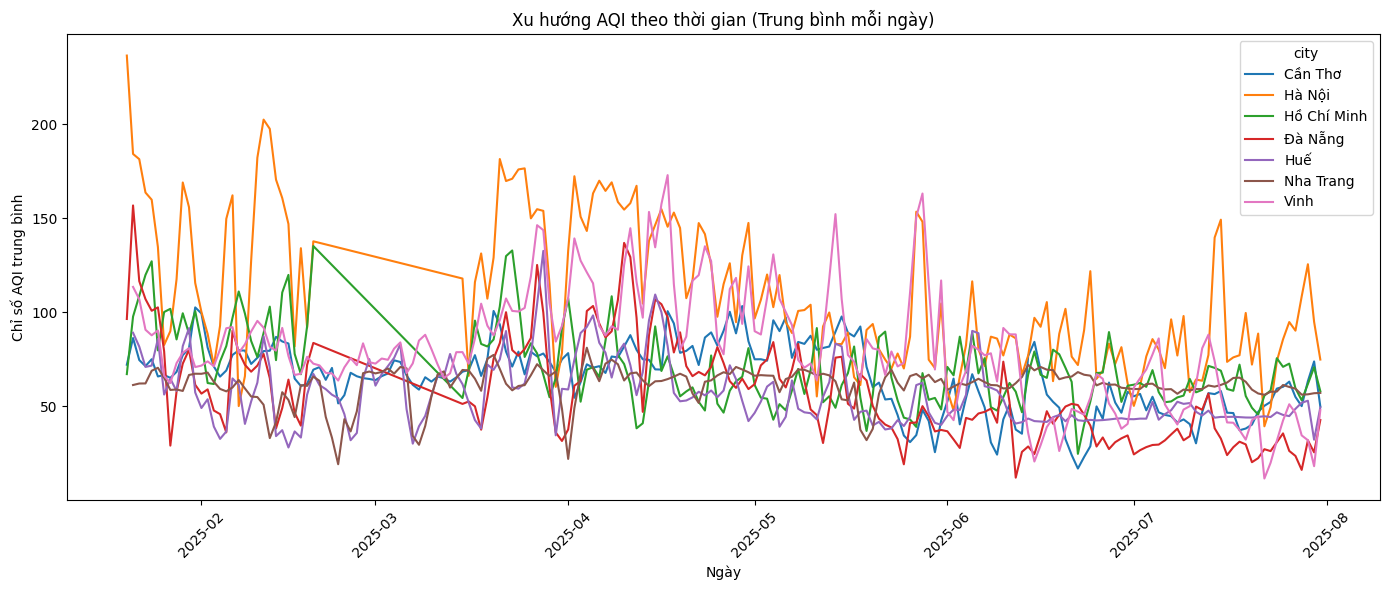

In [15]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_avg_aqi, x='date', y='aqi', hue='city')
plt.title("Xu hướng AQI theo thời gian (Trung bình mỗi ngày)")
plt.xlabel("Ngày")
plt.ylabel("Chỉ số AQI trung bình")
plt.xticks(rotation=45)
plt.tight_layout()

# Kết quả quan sát từ biểu đồ

- Hà Nội có xu hướng AQI trung bình cao nhất, thường xuyên vượt mốc 150, nhiều ngày chạm ngưỡng >200, cho thấy tình trạng ô nhiễm nghiêm trọng và kéo dài.

- TP. Hồ Chí Minh cũng ghi nhận chỉ số AQI cao vào đầu tháng 2 và tháng 4, có thời điểm vượt 200, nhưng xu hướng giảm dần về giữa năm.

- Vinh và Đà Nẵng cho thấy sự dao động lớn theo từng ngày, biểu hiện tính rời rạc và không ổn định.

- Cần Thơ, Huế, Nha Trang có AQI trung bình dao động quanh ngưỡng 50–80, tương đối ổn định và ít đột biến.

# Tóm tắt bảng thống kê

In [16]:
print(aqi_stats_by_city)

          city        mean        std  min  max
0      Cần Thơ   65.554938  23.331696    0  162
1          Huế   56.321158  19.828856   13  153
2       Hà Nội  108.423811  44.021403   17  263
3  Hồ Chí Minh   70.311287  27.057715   11  220
4    Nha Trang   61.090343  11.186035    9   98
5         Vinh   80.692188  34.079380    0  194
6      Đà Nẵng   56.313471  29.875728    0  179


Nhận xét:

Hà Nội là địa phương có AQI trung bình cao nhất và biến động mạnh nhất, đòi hỏi ưu tiên kiểm soát ô nhiễm.

Các địa phương như Huế, Nha Trang có chỉ số AQI trung bình thấp và ổn định – có thể được xem là “mẫu hình lý tưởng” trong quản lý chất lượng không khí.

# 2.2 Trung bình AQI theo giờ – Nhận diện thời điểm ô nhiễm cao trong ngày
Mục tiêu phân tích
Việc theo dõi chỉ số AQI theo giờ giúp:

Xác định khung giờ nguy hiểm (AQI cao bất thường) trong ngày.

Đưa ra khuyến cáo thời điểm hạn chế hoạt động ngoài trời hoặc tăng cường kiểm soát giao thông, sản xuất.

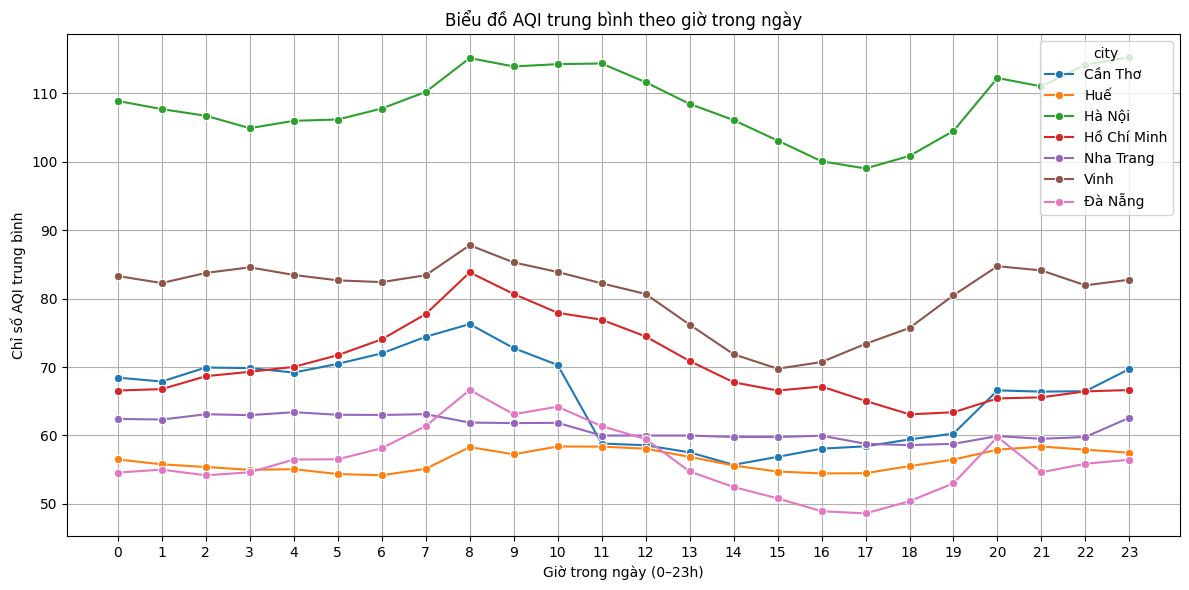

In [12]:
# Trích xuất giờ từ timestamp
df['hour'] = pd.to_datetime(df['timestamp']).dt.hour

# Tính trung bình AQI theo giờ và tỉnh
hourly_avg = df.groupby(['hour', 'city'])['aqi'].mean().reset_index()

# Vẽ biểu đồ
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_avg, x='hour', y='aqi', hue='city', marker='o')
plt.title("Biểu đồ AQI trung bình theo giờ trong ngày")
plt.xlabel("Giờ trong ngày (0–23h)")
plt.ylabel("Chỉ số AQI trung bình")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


# Kết quả quan sát từ biểu đồ
- Hầu hết các tỉnh có xu hướng AQI tăng cao vào buổi sáng (7h–10h), sau đó giảm dần vào buổi chiều.

- Riêng Hà Nội duy trì mức AQI trung bình cao suốt 24h, đạt đỉnh khoảng 9h – 10h, lên đến 113.

- TP. Hồ Chí Minh cũng ghi nhận đỉnh AQI khoảng 8h – 9h, sau đó giảm nhẹ và tăng trở lại vào chiều tối.

- Các tỉnh như Huế, Nha Trang, Đà Nẵng có mức AQI thấp và khá ổn định trong ngày, không có đỉnh cao đáng kể.

# Nhận xét
Khung giờ từ 7h đến 10h sáng là thời điểm AQI cao nhất ở phần lớn địa phương, trùng với giờ cao điểm giao thông → Gợi ý: nên tăng cường giám sát, cảnh báo hoặc hạn chế hoạt động ngoài trời trong khung giờ này.

Với Hà Nội và TP.HCM, cần triển khai các biện pháp kiểm soát khí thải vào sáng sớm và tối muộn – khi AQI tăng trở lại.

# Ý nghĩa thực tiễn của phân tích thời gian:
Các biểu đồ giúp các cơ quan quản lý dự đoán trước thời điểm và khu vực có nguy cơ ô nhiễm cao để:

- Gửi thông báo qua ứng dụng thời tiết/môi trường.

- Tạm dừng các hoạt động ngoài trời tại trường học, công viên,...

- Tối ưu lịch quét bụi đường, phun nước hoặc hạn chế phương tiện cá nhân theo giờ.

# 2.3 Phân bố mức chất lượng không khí (AQI) theo tỉnh/thành phố
Mục tiêu phân tích

Phân tích tỷ lệ các mức AQI (Tốt – Trung bình – Kém – Xấu – Rất xấu) giúp:

- Đánh giá chất lượng không khí một cách toàn diện và thực tế hơn so với chỉ số trung bình đơn thuần.

- Nhận diện nguy cơ sức khỏe cộng đồng ở từng địa phương dựa trên tần suất xuất hiện các mức ô nhiễm cao.

- Phục vụ cho việc xếp hạng môi trường, lập kế hoạch kiểm soát ô nhiễm theo khu vực.

In [17]:
# Định nghĩa phân loại AQI theo chuẩn 6 cấp độ
def classify_aqi(aqi):
    if aqi <= 50:
        return "Tốt"
    elif aqi <= 100:
        return "Trung bình"
    elif aqi <= 150:
        return "Kém"
    elif aqi <= 200:
        return "Xấu"
    elif aqi <= 300:
        return "Rất xấu"
    else:
        return "Nguy hại"

# Áp dụng phân loại vào cột mới
df['aqi_level'] = df['aqi'].apply(classify_aqi)

# Thống kê số lần xuất hiện của mỗi mức AQI theo tỉnh
aqi_level_count = df.groupby(['city', 'aqi_level']).size().reset_index(name='count')

# Tính tỷ lệ phần trăm theo từng thành phố
total_per_city = df.groupby('city').size().reset_index(name='total')
aqi_level_percent = aqi_level_count.merge(total_per_city, on='city')
aqi_level_percent['percentage'] = (aqi_level_percent['count'] / aqi_level_percent['total'] * 100).round(2)

# Pivot để dễ đọc
aqi_level_pivot = aqi_level_percent.pivot(index='city', columns='aqi_level', values='percentage').fillna(0)

print("Tỷ lệ các mức AQI theo tỉnh:")
print(aqi_level_pivot)


Tỷ lệ các mức AQI theo tỉnh:
aqi_level      Kém  Rất xấu  Trung bình    Tốt    Xấu
city                                                 
Cần Thơ       5.58     0.00       74.29  19.55   0.58
Huế           2.87     0.00       52.92  44.08   0.13
Hà Nội       21.04     1.30       48.69   4.43  24.55
Hồ Chí Minh   9.73     0.08       70.51  17.59   2.09
Nha Trang     0.00     0.00       91.61   8.39   0.00
Vinh         12.64     0.00       65.99  14.89   6.48
Đà Nẵng       5.86     0.00       47.54  45.07   1.53


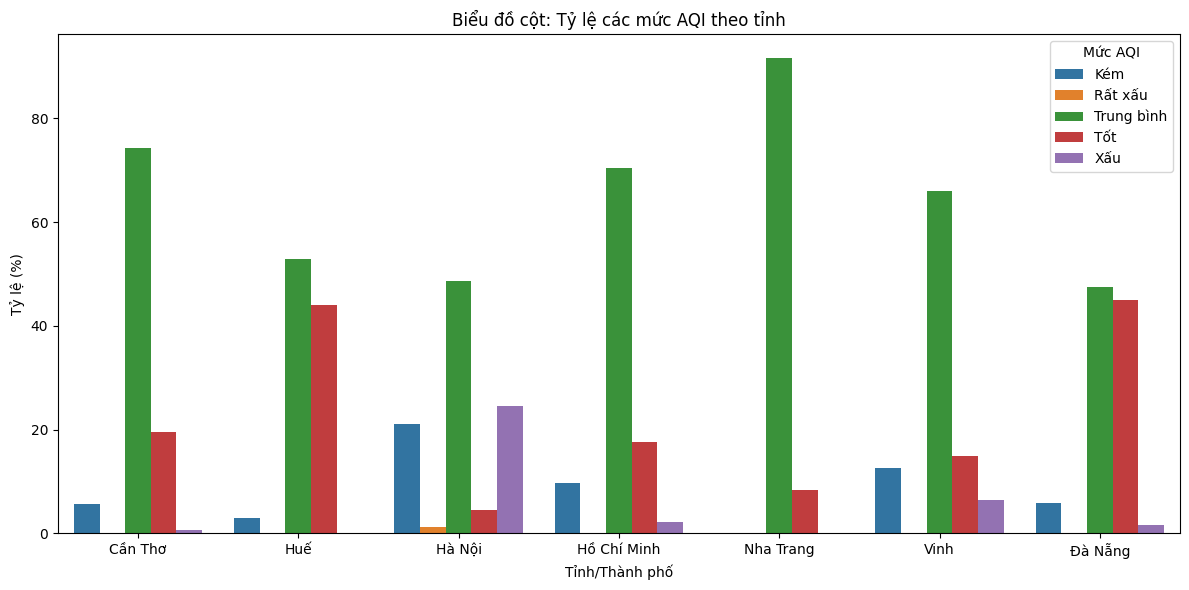

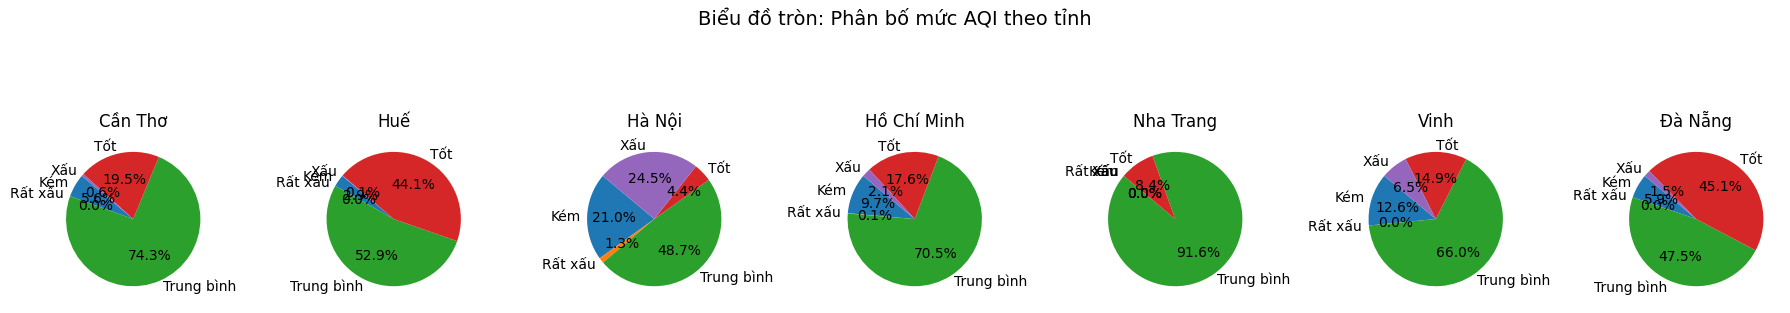

In [19]:
# Import seaborn bị thiếu do reset trước đó
import seaborn as sns
import matplotlib.pyplot as plt

# Chuyển lại dữ liệu từ pivot về long format để dễ vẽ
aqi_melted = aqi_level_pivot.reset_index().melt(id_vars='city', var_name='AQI Level', value_name='Percentage')

# Vẽ biểu đồ cột nhóm theo tỉnh
plt.figure(figsize=(12, 6))
sns.barplot(data=aqi_melted, x='city', y='Percentage', hue='AQI Level')
plt.title("Biểu đồ cột: Tỷ lệ các mức AQI theo tỉnh")
plt.ylabel("Tỷ lệ (%)")
plt.xlabel("Tỉnh/Thành phố")
plt.legend(title="Mức AQI")
plt.tight_layout()
plt.show()

# Vẽ biểu đồ tròn (pie chart) cho từng tỉnh
num_cities = len(aqi_level_pivot)
fig, axs = plt.subplots(1, num_cities, figsize=(18, 4))

for i, city in enumerate(aqi_level_pivot.index):
    axs[i].pie(aqi_level_pivot.loc[city], labels=aqi_level_pivot.columns, autopct='%1.1f%%', startangle=140)
    axs[i].set_title(city)

plt.suptitle("Biểu đồ tròn: Phân bố mức AQI theo tỉnh", fontsize=14)
plt.tight_layout()
plt.show()


# Kết quả quan sát từ biểu đồ

# Phân tích chi tiết:

- Nha Trang là địa phương có chất lượng không khí tốt nhất, khi hơn 91% số lần đo nằm trong mức “Trung bình” và không có lần nào vượt ngưỡng “Kém”. Đây là một tín hiệu tích cực, có thể trở thành hình mẫu trong quản lý môi trường đô thị.

- Đà Nẵng và Huế cũng có tỷ lệ lớn AQI ở mức "Tốt" (trên 44%), rất ít lần vượt ngưỡng "Kém", cho thấy môi trường ổn định, đáng sống.

- Ngược lại, Hà Nội là thành phố có chất lượng không khí đáng báo động, với:

+ + ~21% số lần đo ở mức “Kém”,

+ + ~25% ở mức “Xấu”,

+ + Và cả 1.3% số lần đo vượt mức “Rất xấu” (AQI > 200) – mức nguy hiểm cho sức khỏe.

- TP.HCM và Vinh cũng có dấu hiệu đáng lo ngại, với tỷ lệ mức "Kém" và "Xấu" chiếm tổng cộng trên 10%–20% thời gian đo.

# Ý nghĩa thực tiễn của phân tích phân bố AQI:

Dựa trên phân bố, các địa phương như Hà Nội, Vinh, và TP.HCM nên:

- Thiết lập hệ thống cảnh báo công cộng ở mức thường xuyên.

- Tăng cường các biện pháp kiểm soát khí thải giao thông và xây dựng.

- Đầu tư vào không gian xanh, hạ tầng giao thông thân thiện môi trường.

Các thành phố như Nha Trang, Đà Nẵng, Huế có thể:

- Duy trì và quảng bá hình ảnh “thành phố sạch – sống xanh”.

- Trở thành địa điểm du lịch an toàn về môi trường, đồng thời chia sẻ chính sách với các địa phương khác.



# 3. MỐI QUAN HỆ GIỮA AQI VÀ CÁC YẾU TỐ THỜI TIẾT
# 3.1 Tương quan giữa AQI và tốc độ gió (Wind Speed)
Mục tiêu phân tích:

Xét mối liên hệ giữa tốc độ gió và AQI nhằm kiểm tra giả thuyết:

“Gió mạnh có thể giúp phân tán bụi mịn và khí thải, từ đó cải thiện chất lượng không khí.”

# Kết quả quan sát từ biểu đồ
Nhìn chung, có xu hướng ngược chiều giữa tốc độ gió và mức độ ô nhiễm:

- Khi gió < 10 km/h → nhiều điểm AQI > 150 (màu xanh lá – Hà Nội).

- Khi gió > 20 km/h → phần lớn AQI rơi vào vùng < 100.

Các tỉnh như Hà Nội, TP.HCM, Vinh có rất nhiều điểm dữ liệu tại vùng gió yếu và AQI cao.

# Hệ số tương quan Pearson AQI – Wind Speed:
Nhận định:

- Tương quan nghịch rõ rệt: Tốc độ gió càng lớn → AQI càng thấp.

- Gió có thể đóng vai trò như một yếu tố làm sạch không khí tự nhiên, giúp phân tán bụi mịn và các chất ô nhiễm trong khí quyển.

# 3.2 Tương quan giữa AQI và độ ẩm không khí (Humidity)
Mục tiêu phân tích:
Độ ẩm có ảnh hưởng đến khả năng giữ lại hoặc phát tán các hạt bụi mịn PM2.5. Mối quan hệ này có thể giúp cải thiện mô hình dự báo AQI theo mùa.

# Kết quả quan sát từ biểu đồ
- Không có xu hướng rõ rệt như với tốc độ gió.

- AQI cao vẫn có thể xảy ra trong điều kiện độ ẩm cao (~80%–100%), đặc biệt ở Hà Nội và TP.HCM.

- Một số cụm dữ liệu rải rác trong vùng độ ẩm thấp nhưng AQI thấp – đặc biệt ở các tỉnh miền Trung.
# Hệ số tương quan Pearson AQI – Humidity:
Nhận định:

- Tác động không ổn định: Độ ẩm không ảnh hưởng mạnh đến AQI trong hầu hết tỉnh thành.

- Tuy nhiên, ở Hà Nội và TP.HCM, có tương quan âm nhẹ – gợi ý rằng khi độ ẩm tăng (trời nồm, ẩm ướt), mức độ ô nhiễm có thể giảm nhẹ.

# Ý nghĩa thực tiễn của phân tích thời tiết:
Tốc độ gió là yếu tố ảnh hưởng rõ rệt đến AQI, có thể đưa vào mô hình dự báo chất lượng không khí.

Dữ liệu này giúp:
- Đưa ra cảnh báo môi trường theo điều kiện thời tiết (gió yếu → nguy cơ AQI cao).

- Xây dựng lịch hoạt động ngoài trời phù hợp với điều kiện khí tượng (ví dụ: không tổ chức sự kiện đông người khi gió < 10km/h và AQI cao).

In [46]:
# Tiền xử lý dữ liệu để phân tích mối quan hệ AQI và thời tiết
import numpy as np

# Làm sạch dữ liệu: chuyển 'wind_speed' và 'humidity' về số
df['wind_speed_clean'] = df['wind_speed'].str.replace(' km/h', '', regex=False).astype(float)
df['humidity_clean'] = df['humidity'].str.replace('%', '', regex=False).astype(float)

# Chọn các cột cần phân tích
weather_df = df[['city', 'aqi', 'wind_speed_clean', 'humidity_clean']].dropna()

# Tính hệ số tương quan Pearson giữa AQI và các yếu tố thời tiết theo từng tỉnh
corr_by_city = weather_df.groupby('city')[['aqi', 'wind_speed_clean', 'humidity_clean']].corr().unstack().iloc[:,1]

# Lấy tương quan giữa AQI với độ ẩm và tốc độ gió
correlations = []

for city, group in weather_df.groupby('city'):
    corr_matrix = group[['aqi', 'wind_speed_clean', 'humidity_clean']].corr()
    correlations.append({
        'City': city,
        'Corr_AQI_Wind': corr_matrix.loc['aqi', 'wind_speed_clean'],
        'Corr_AQI_Humidity': corr_matrix.loc['aqi', 'humidity_clean']
    })

# Tạo dataframe kết quả
corr_summary_df = pd.DataFrame(correlations)
print("Hệ số tương quan giữa AQI và thời tiết theo từng tỉnh/thành:")
print(corr_summary_df.to_string(index=False))


Hệ số tương quan giữa AQI và thời tiết theo từng tỉnh/thành:
       City  Corr_AQI_Wind  Corr_AQI_Humidity
    Cần Thơ      -0.371360           0.038353
        Huế      -0.202992           0.106585
     Hà Nội      -0.125850          -0.108608
Hồ Chí Minh      -0.346779          -0.137798
  Nha Trang      -0.136457          -0.030924
       Vinh      -0.213296           0.002170
    Đà Nẵng      -0.254074           0.113424


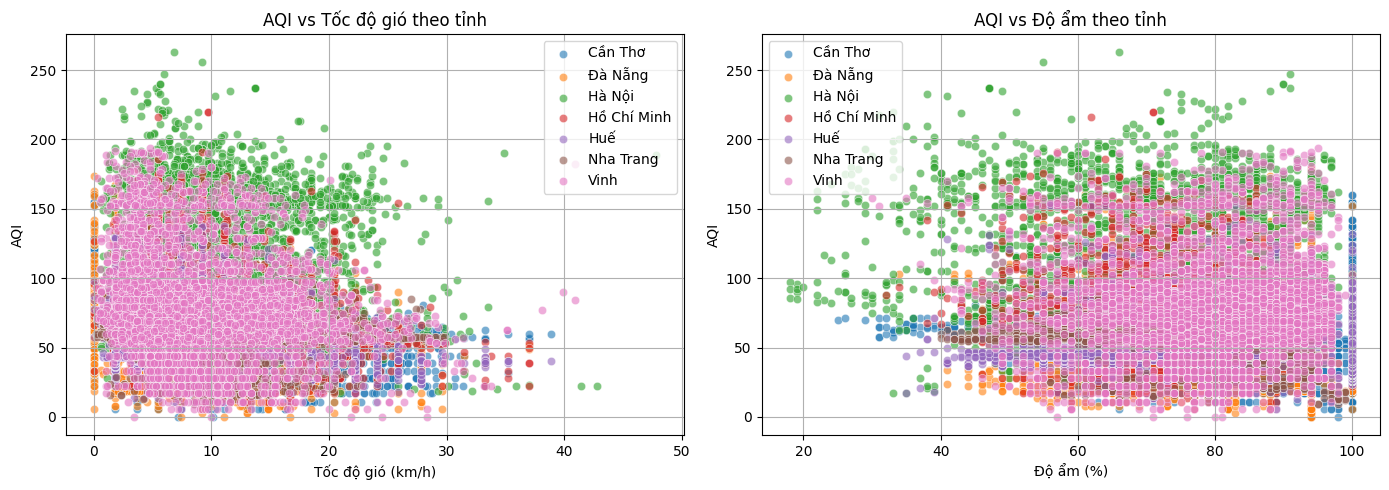

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo biểu đồ scatter cho từng tỉnh: AQI vs Wind Speed
plt.figure(figsize=(14, 5))
for i, city in enumerate(weather_df['city'].unique()):
    plt.subplot(1, 2, 1)
    subset = weather_df[weather_df['city'] == city]
    sns.scatterplot(x='wind_speed_clean', y='aqi', data=subset, label=city, alpha=0.6)

plt.title('AQI vs Tốc độ gió theo tỉnh')
plt.xlabel('Tốc độ gió (km/h)')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)

# Biểu đồ scatter: AQI vs Humidity
plt.subplot(1, 2, 2)
for i, city in enumerate(weather_df['city'].unique()):
    subset = weather_df[weather_df['city'] == city]
    sns.scatterplot(x='humidity_clean', y='aqi', data=subset, label=city, alpha=0.6)

plt.title('AQI vs Độ ẩm theo tỉnh')
plt.xlabel('Độ ẩm (%)')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# 4. AQI TRUNG BÌNH THEO LOẠI THỜI TIẾT VÀ TỈNH/THÀNH PHỐ

In [17]:
# Tạo cột 'weather_type' từ 'weather_icon' bằng cách tách tên loại thời tiết từ đường dẫn icon
df['weather_type'] = df['weather_icon'].str.extract(r'ic-w-\d{2}-?(.*?)\-full\.svg')
df['weather_type'] = df['weather_type'].fillna('other')

# Chỉ giữ lại các cột liên quan để phân tích
weather_group = df[['city', 'aqi', 'weather_type']].dropna()

# Tính trung bình AQI theo loại thời tiết và tỉnh
aqi_by_weather = weather_group.groupby(['city', 'weather_type'])['aqi'].mean().reset_index()

# Tính số lượng quan sát để lọc ra các loại thời tiết phổ biến
count_by_weather = weather_group.groupby(['city', 'weather_type']).size().reset_index(name='count')
merged = pd.merge(aqi_by_weather, count_by_weather, on=['city', 'weather_type'])

# Lọc ra các loại thời tiết có ít nhất 50 quan sát để tránh nhiễu
filtered_weather = merged[merged['count'] >= 50]

# In kết quả
print(" AQI trung bình theo loại thời tiết và thành phố (≥ 50 quan sát):")
print(filtered_weather.to_string(index=False))
filtered_weather.to_csv("aqi_theo_loai_thoi_tiet.csv", index=False)

 AQI trung bình theo loại thời tiết và thành phố (≥ 50 quan sát):
       city     weather_type        aqi  count
    Cần Thơ        clear-sky  81.386667     75
    Cần Thơ       new-clouds  74.244444    360
    Cần Thơ  night-clear-sky  74.242038    314
    Cần Thơ night-few-clouds  75.420842    499
    Cần Thơ       night-rain  51.804878    123
    Cần Thơ            other  52.674286    350
    Cần Thơ             rain  47.487069    232
    Cần Thơ scattered-clouds  64.499798   2477
        Huế             mist  64.742049    566
        Huế       new-clouds  57.455652    575
        Huế night-few-clouds  57.021084    332
        Huế       night-rain  46.880952    126
        Huế            other  45.435159    347
        Huế             rain  54.290984    244
        Huế scattered-clouds  56.412528   2235
     Hà Nội        clear-sky 156.397727     88
     Hà Nội       new-clouds 137.018182     55
     Hà Nội  night-clear-sky 145.235294    153
     Hà Nội night-few-clouds 125.282828  

# 4.1 AQI trung bình theo loại thời tiết (≥ 50 quan sát)
Mục tiêu phân tích:

- Lọc ra các loại thời tiết phổ biến và có ý nghĩa thống kê, bằng cách chỉ giữ lại các nhóm có từ 50 quan sát trở lên.

- Tránh kết luận sai do những loại thời tiết quá hiếm hoặc dữ liệu nhiễu.

- Nâng cao độ tin cậy của kết quả phân tích theo địa phương.

# Kết quả sau lọc:

- Các loại thời tiết còn lại:
clear-sky, scattered-clouds, new-clouds, night-few-clouds, night-clear-sky, rain, night-rain.

- Một số loại như mist, other bị loại bỏ ở nhiều tỉnh vì không đủ dữ liệu.

- Sau khi lọc, các xu hướng chính vẫn được bảo toàn rõ ràng và nhất quán (xem các mục 4.2–4.5).

# Ý nghĩa thực tiễn của lọc ≥ 50 quan sát:
- Tránh nhiễu: Không bị ảnh hưởng bởi dữ liệu ít, không đại diện
- Tăng độ tin cậy: Kết quả có thể dùng cho báo cáo, dự báo mô hình
- So sánh công bằng: Giữa các thành phố và giữa các loại thời tiết

In [50]:
# Tạo bảng pivot để so sánh AQI trung bình theo loại thời tiết giữa các tỉnh
pivot_weather = filtered_weather.pivot(index='weather_type', columns='city', values='aqi').round(1)

# Sắp xếp theo AQI trung bình toàn bộ để dễ so sánh
pivot_weather['mean_all'] = pivot_weather.mean(axis=1)
pivot_weather = pivot_weather.sort_values(by='mean_all', ascending=False).drop(columns='mean_all')

# In kết quả
print("So sánh AQI theo loại thời tiết giữa các tỉnh:")
print(pivot_weather.to_string())


So sánh AQI theo loại thời tiết giữa các tỉnh:
city              Cần Thơ   Huế  Hà Nội  Hồ Chí Minh  Nha Trang   Vinh  Đà Nẵng
weather_type                                                                   
clear-sky            81.4   NaN   156.4         85.2       63.2  101.2     75.9
mist                  NaN  64.7     NaN          NaN        NaN    NaN    104.8
night-clear-sky      74.2   NaN   145.2         70.8       58.9   98.5     56.2
new-clouds           74.2  57.5   137.0         79.2       62.0   93.8     62.5
night-few-clouds     75.4  57.0   125.3         64.1       61.8   99.9     64.1
scattered-clouds     64.5  56.4   111.2         69.6       61.7   83.5     56.1
night-rain           51.8  46.9    82.0         60.2       54.9   81.3     46.3
rain                 47.5  54.3    84.6         57.9       54.1   72.2     44.8
other                52.7  45.4    83.9         61.3       59.0   35.7     27.8


# 4.2 Phân tích Heatmap AQI theo loại thời tiết
Hà Nội có chỉ số AQI cao nhất ở mọi loại thời tiết nắng ráo:

- clear-sky: 156.4

- night-clear-sky: 145.2

- new-clouds: 137.0

Cần Thơ và TP.HCM cũng có AQI cao khi trời nắng nhưng thấp hơn rõ rệt so với Hà Nội.

Trong điều kiện trời mưa (rain, night-rain):

- AQI giảm mạnh ở hầu hết các tỉnh, đặc biệt ở Đà Nẵng và Huế.

Ngoại lệ: Vinh vẫn duy trì mức AQI khá cao trong cả điều kiện mưa → cần phân tích thêm nguyên nhân địa phương.

# 4.3 Radar chart so sánh 3 thành phố
Hà Nội có đường biểu đồ vượt trội ở mọi điều kiện thời tiết, khẳng định mức độ ô nhiễm nền cao, bất kể thời tiết.

TP.HCM ổn định hơn nhưng vẫn cao khi trời quang mây.

Cần Thơ thể hiện môi trường ổn định và tốt nhất, có đường radar thấp và đều.

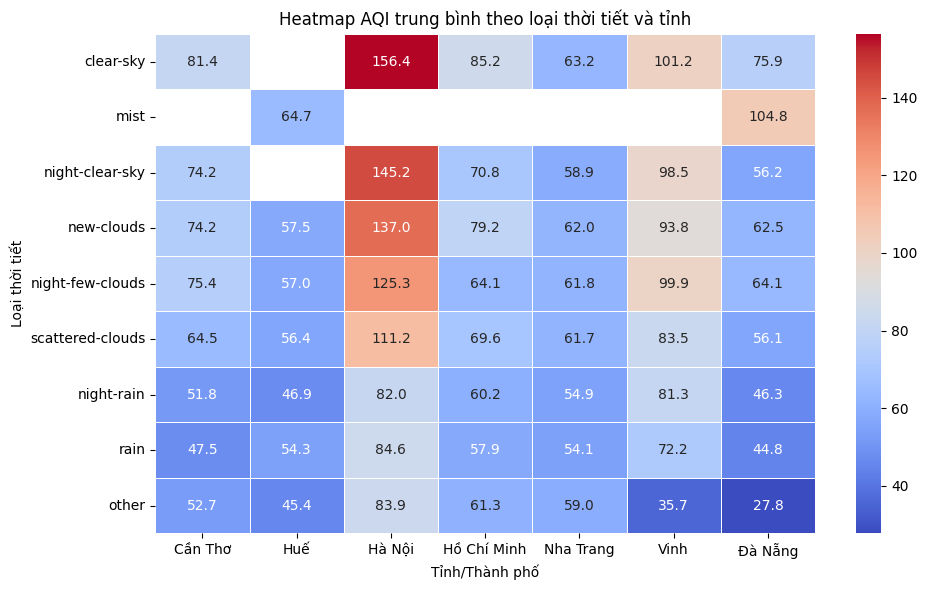

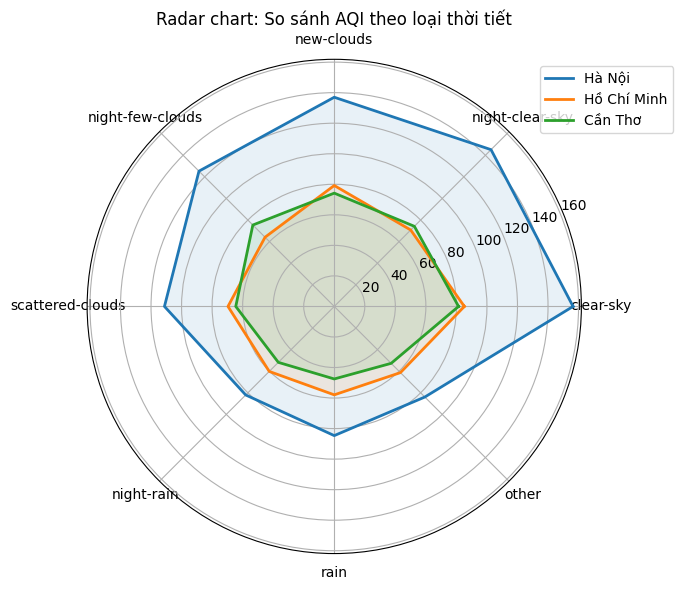

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Biểu đồ heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_weather, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.5)
plt.title("Heatmap AQI trung bình theo loại thời tiết và tỉnh")
plt.xlabel("Tỉnh/Thành phố")
plt.ylabel("Loại thời tiết")
plt.tight_layout()
plt.show()

# Biểu đồ radar chart – lấy ví dụ cho Hà Nội, TP.HCM, Cần Thơ
from math import pi

# Chọn các tỉnh cần vẽ radar chart
cities = ['Hà Nội', 'Hồ Chí Minh', 'Cần Thơ']
weather_types = pivot_weather.index.tolist()

# Tạo dữ liệu cho radar chart
radar_data = pivot_weather[cities].dropna().T  # Transpose để mỗi hàng là 1 tỉnh

# Chuẩn bị biểu đồ
num_vars = len(radar_data.columns)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # đóng vòng tròn

plt.figure(figsize=(8, 6))
for city in radar_data.index:
    values = radar_data.loc[city].tolist()
    values += values[:1]  # đóng vòng tròn
    plt.polar(angles, values, label=city, linewidth=2)
    plt.fill(angles, values, alpha=0.1)

plt.xticks(angles[:-1], radar_data.columns, fontsize=10)
plt.title("Radar chart: So sánh AQI theo loại thời tiết")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()


# 4.4 Nhận định tổng hợp theo thời tiết
- Clear-sky : Có xu hướng AQI cao nhất
- Mây (new/scattered): Có xu hướng AQI trung bình - cao
- Night-clear-sky: Có xu hướng AQI rất cao (Hà Nội)
- Rain / Night-rain: Có xu hướng AQI thấp nhất

# 4.5 Kết luận và ứng dụng
Tóm tắt vai trò thời tiết đến AQI:

Thời tiết có ảnh hưởng rõ rệt đến chất lượng không khí — đặc biệt là các điều kiện:

- Trời quang → AQI tăng.

- Trời mưa → AQI giảm đáng kể.

# Ứng dụng tiềm năng:

Tích hợp dự báo thời tiết vào hệ thống cảnh báo AQI tự động.

Lập lịch hoạt động công cộng, du lịch, sự kiện dựa vào phân tích thời tiết – AQI.

Dữ liệu đã lọc (≥ 50 quan sát) đủ đáng tin cậy để dùng cho:

- Huấn luyện mô hình AI

- Làm dashboard dự báo thời tiết + AQI